当模型需要考虑较远位置的上下文信息时，使用简单神经网络可能丧失学到距离较远的信息的能力。或者在负载语言场景中，有用信息的间隔有大有小、长短不一，循环神经网络的心梗也会受到限制。长短时记忆网络(long short-term memory, LSTM)的提出就是为了解决这个问题。与单一tanh循环体结构不同，LSTM是一种拥有三个门结构的特殊网络结构。<br/>
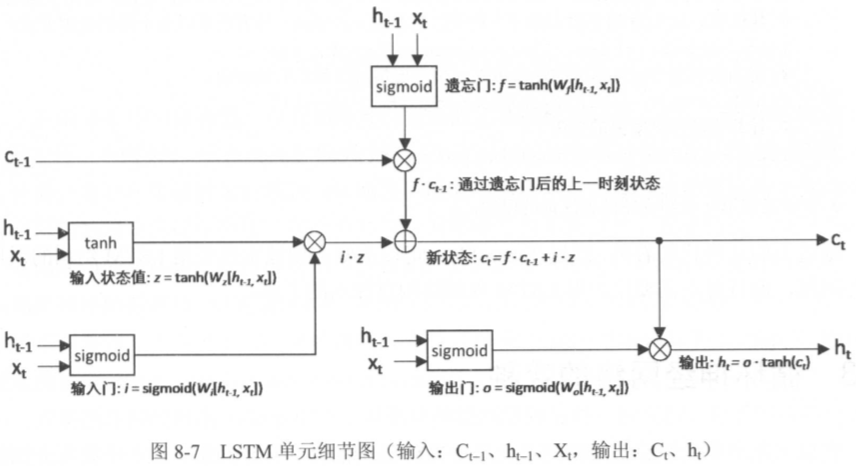
使用LSTM结构的循环神经网络的前向传播是一个相对比较复杂的过程，具体LSTM每个门的公式定义如下：
$$
\begin{aligned}
z &= tanh(W_z[h_{t-1}, x_t])\, (输入值) \\
i &= sigmoid(W_i[h_{t-1}, x_t])\, (输入门)\\
f &= sigmoid(W_f[h_{t-1}, x_t])\, (遗忘门)\\
o &= sigmoid(W_o[h_{t-1}, x_t])\, (输出门)\\
c_t &= f \cdot c_{t-1} + i \cdot z\, (新状态)\\
h_t &= o\cdot tanh c_t\, (输出)
\end{aligned}
$$
其中$W_z、W_i、W_f、W_o$是4个维度为$[2n, n]$的参数矩阵。
为了使循环神经网络有效的保存长期记忆，遗忘门和输入门至关重要，也是LSTM结构的核心。<br/>
- 遗忘门。让循环神经网络忘记之前没有用的信息。遗忘门会根据当前的输入$x_t$和上一时刻的输出$h_{t-1}$决定哪一部分的记忆需要被遗忘。<br/>
- 输入门。从当前的输入补充最新的记忆。输入门会根据$x_t$和$h_{t-1}$决定哪些信息加入到状态$c_{t-1}$中生成新的状态$c_t$。<br/>
- 输出门。LSTM结构在计算得到新的状态$c_t$后需要产生当前时刻的输出。输出门会根据最新的状态$c_t$，上一时刻的输出$h_{t-1}$和当前的输入$x_t$来决定该时刻的输出$h_t$。<br/>

TensorFlow中实现使用LSTM结构的循环神经网络的前向传播过程。

In [ ]:
# 定义一个LSTM结构
lstm = tf.nn.rnn_cell.BasicLSTMCell(lstm_hidden_size)
# 将LSTM中状态初始化为全0数组
# state是一个包含两个张量的LSTMStateTuple类
# 在优化循环神经网络时，每次也会使用一个batch的训练样本
state = lstm.zero_state(batch_size, tf.float32)
# 定义损失函数
loss = 0.0
# 虽然测试时循环神经网络可以处理任意长度的序列，但是在训练中为了将
# 循环网络展开成前馈神经网络，需要知道训练数据的序列长度num_steps。
for i in range(num_steps):
    # 在第一个时刻声明LSTM结构中的变量，其他时刻复用之前定义好的变量
    if i > 0: tf.get_variable_scope().reuse_variables()
    # 每一步处理时间序列中的一个时刻
    lstm_output, state = lstm(current_input, state)
    # 将当前时刻LSTM结构的输出出入一个全连接层得到最后的输出
    final_output = fully_connected(lstm_output)
    # 计算当前时刻输出的损失
    loss += calc_loss(final_output, excepted_output)